**IMPORT libraries**


In [ ]:
# Install libraries (if not installed)
!pip install -q seaborn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# DATASET LOADING

In [ ]:
import pandas as pd

# Load datasets
dataset1 = pd.read_csv('/content/spam.csv', encoding='latin-1')
dataset2 = pd.read_csv('/content/spam2.csv', encoding='latin-1')

# Display the first few rows of each dataset
print("Dataset 1:")
print(dataset1.head())

print("\nDataset 2:")
print(dataset2.head())



Dataset 1:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset 2:
  label                                            message Unnamed: 2  \
0     1  ounce feather bowl hummingbird opec moment ala...        NaN   
1     1  wulvob get your medircations online qnb ikud v...        NaN   
2     0   computer connection from cnn com wednesday es...        NaN   
3     1  university degree obtain a prosperous future m...        NaN   
4     0  thanks for all your answers guys i know i shou...        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        

<ipython-input-3-865b0ccc7669>:5: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset2 = pd.read_csv('/content/spam2.csv', encoding='latin-1')


ABOUT HOW MANY SPAMS OR HAMS

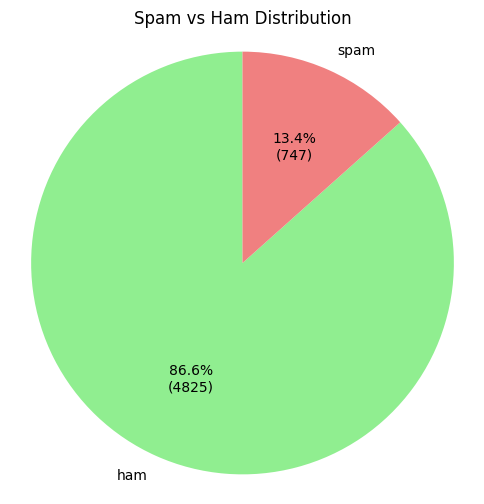

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/spam.csv')

# Count occurrences
label_counts = df['label'].value_counts()

# Function to show both count and percentage
def format_label(pct, allvals):
    count = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({count})"

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts,
        labels=label_counts.index,
        autopct=lambda pct: format_label(pct, label_counts),
        startangle=90,
        colors=['lightgreen', 'lightcoral'])
plt.title('Spam vs Ham Distribution')
plt.axis('equal')  # Ensures pie chart is a circle
plt.show()



<ipython-input-5-ef7f80ddf3a1>:5: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/spam2.csv')


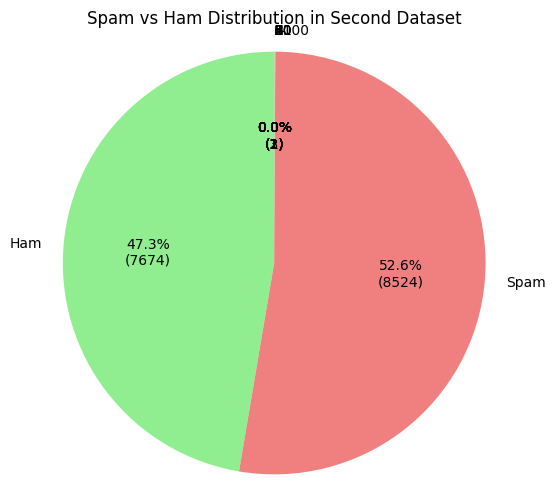

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df2 = pd.read_csv('/content/spam2.csv')

# Clean column name if needed
df2.columns = df2.columns.str.strip().str.lower()

# Convert 'label' column to numeric, handling errors
df2['label'] = pd.to_numeric(df2['label'], errors='coerce')

# Drop rows with invalid (NaN) labels
df2 = df2.dropna(subset=['label'])

# Convert 'label' to integers
df2['label'] = df2['label'].astype(int)

# Get counts
label_counts = df2['label'].value_counts().sort_index()

# Get corresponding labels
labels = ['Ham' if label == 0 else 'Spam' if label == 1 else str(label) for label in label_counts.index.tolist()]

# Custom function to show both % and count
def format_label(pct, allvals):
    count = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({count})"

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts,
        labels=labels,
        autopct=lambda pct: format_label(pct, label_counts),
        startangle=90,
        colors=['lightgreen', 'lightcoral'])
plt.title('Spam vs Ham Distribution in Second Dataset')
plt.axis('equal')  # Keep it circular
plt.show()


DATASET COMBINING

In [ ]:
print(dataset2.columns)


Index(['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 412', 'Unnamed: 413', 'Unnamed: 414', 'Unnamed: 415',
       'Unnamed: 416', 'Unnamed: 417', 'Unnamed: 418', 'Unnamed: 419',
       'Unnamed: 420', 'Unnamed: 421'],
      dtype='object', length=422)


In [ ]:
dataset2 = dataset2[['label', 'message']]


In [ ]:
dataset1.columns = ['label', 'message']
dataset2.columns = ['label', 'message']


In [ ]:
combined_df = pd.concat([dataset1[['label', 'message']], dataset2[['label', 'message']]], ignore_index=True)


In [ ]:
# Display the combined dataset
print("\nCombined Dataset:")
print(combined_df.head())


Combined Dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...




```
`# This is formatted as code`
```

# **text preprocessing**

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = ''.join([char for char in text if char not in string.punctuation])

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords and non-alphabetic words
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

        # Lemmatize the tokens
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Join the tokens back into a single string
        return ' '.join(tokens)
    else:
        # Handle non-string values (e.g., convert to string or return an empty string)
        return str(text) # or return ''

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Apply the preprocessing function to the 'message' column
combined_df['cleaned_message'] = combined_df['message'].apply(preprocess_text)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(combined_df.head())



Cleaned Dataset:
  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts may...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though  


In [ ]:
# Save the cleaned dataset to a CSV file
combined_df.to_csv('/content/cleaned_spam.csv', index=False)

# Provide a download link for the cleaned dataset
from google.colab import files
files.download('/content/cleaned_spam.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ML MODELS**

In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_spam.csv')

# Convert 'label' column to numeric if it's not already
df['label'] = pd.to_numeric(df['label'], errors='coerce')

# Drop rows with missing values in 'label'
df = df.dropna(subset=['label'])

# Now proceed with splitting the data
X = df['cleaned_message']
y = df['label'].map({'ham': 0, 'spam': 1})  # Map 'ham' to 0 and 'spam' to 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Replace NaN values with empty strings in X_train and X_test before transforming
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test) # Now this line should work without error

In [ ]:
print(y.isnull().sum())


12128


In [ ]:
# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Drop rows where 'label' is NaN
df.dropna(subset=['label'], inplace=True)

# Separate features and target
X = df['cleaned_message']
y = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
print(y.dtype)


int64


In [ ]:
y = y.astype(int)


In [ ]:
print("Dataset 1 shape:", dataset1.shape)
print("Dataset 2 shape:", dataset2.shape)


Dataset 1 shape: (5572, 2)
Dataset 2 shape: (14748, 2)


In [ ]:
# Combine datasets
combined_df = pd.concat([dataset1[['label', 'message']], dataset2[['label', 'message']]], ignore_index=True)

# Drop rows with missing values in 'label' or 'message'
combined_df.dropna(subset=['label', 'message'], inplace=True)

# Verify the shape after dropping missing values
print("Combined dataset shape after dropping missing values:", combined_df.shape)


Combined dataset shape after dropping missing values: (19187, 2)


In [ ]:
combined_df['cleaned_message'] = combined_df['message'].apply(preprocess_text)

# Drop rows where 'cleaned_message' is empty
combined_df = combined_df[combined_df['cleaned_message'].str.strip() != '']

# Verify the shape after preprocessing
print("Combined dataset shape after preprocessing:", combined_df.shape)


Combined dataset shape after preprocessing: (19140, 3)


In [ ]:
from sklearn.model_selection import train_test_split

X = combined_df['cleaned_message']
y = combined_df['label'].map({'ham': 0, 'spam': 1})

# Drop any remaining rows with missing labels
X = X[~y.isnull()]
y = y[~y.isnull()]

# Final check
print("Number of samples:", len(X))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Number of samples: 5563


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Linear SVM": LinearSVC(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Naive Bayes
Accuracy: 0.9695
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       956
         1.0       1.00      0.78      0.88       157

    accuracy                           0.97      1113
   macro avg       0.98      0.89      0.93      1113
weighted avg       0.97      0.97      0.97      1113

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9596
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       956
         1.0       1.00      0.71      0.83       157

    accuracy                           0.96      1113
   macro avg       0.98      0.86      0.90      1113
weighted avg       0.96      0.96      0.96      1113

--------------------------------------------------
Model: Linear SVM
Accuracy: 0.9802
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       956
         1.0       0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.9686
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       956
         1.0       0.94      0.83      0.88       157

    accuracy                           0.97      1113
   macro avg       0.96      0.91      0.93      1113
weighted avg       0.97      0.97      0.97      1113

--------------------------------------------------


In [ ]:
import pandas as pd

accuracy_data = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred = model.predict(X_test_tfidf)

    accuracy_data.append({
        "Model": name,
        "Training Accuracy": accuracy_score(y_train, y_train_pred),
        "Testing Accuracy": accuracy_score(y_test, y_test_pred)
    })

df_acc = pd.DataFrame(accuracy_data)
print(df_acc)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                 Model  Training Accuracy  Testing Accuracy
0          Naive Bayes           0.976629          0.969452
1  Logistic Regression           0.967416          0.959569
2           Linear SVM           0.999101          0.980234
3        Random Forest           0.904944          0.899371
4              XGBoost           0.989438          0.968553


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


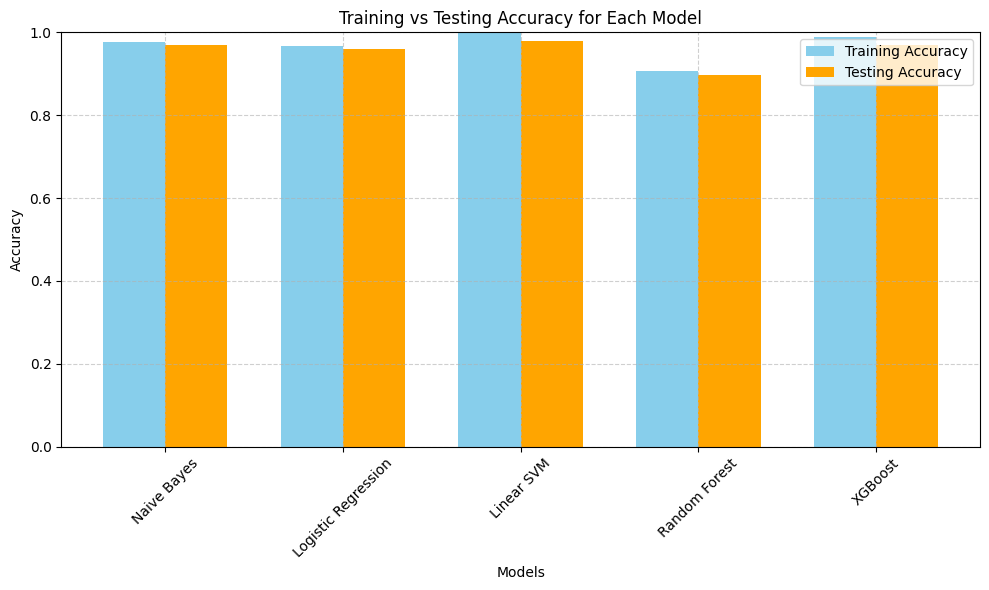

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Dictionary to store accuracy results
accuracy_data = []

# Train models and collect accuracies
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred = model.predict(X_test_tfidf)

    accuracy_data.append({
        "Model": name,
        "Training Accuracy": accuracy_score(y_train, y_train_pred),
        "Testing Accuracy": accuracy_score(y_test, y_test_pred)
    })

# Convert to DataFrame
df_acc = pd.DataFrame(accuracy_data)

# Plotting
x = df_acc["Model"]
train_acc = df_acc["Training Accuracy"]
test_acc = df_acc["Testing Accuracy"]

x_indices = range(len(x))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x_indices, train_acc, width=bar_width, label='Training Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x_indices], test_acc, width=bar_width, label='Testing Accuracy', color='orange')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy for Each Model")
plt.xticks([i + bar_width/2 for i in x_indices], x, rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix for Naive Bayes


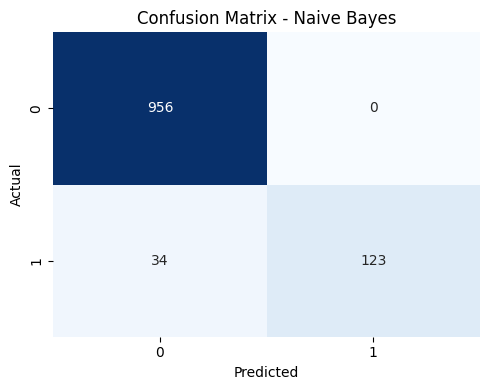


Confusion Matrix for Logistic Regression


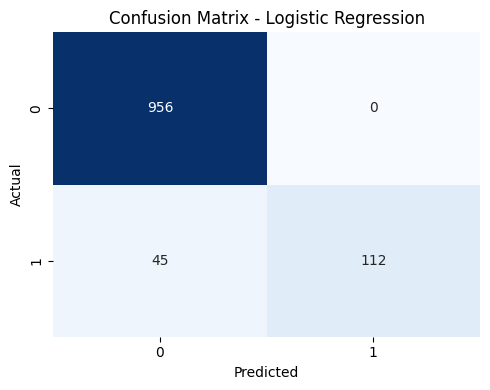


Confusion Matrix for Linear SVM


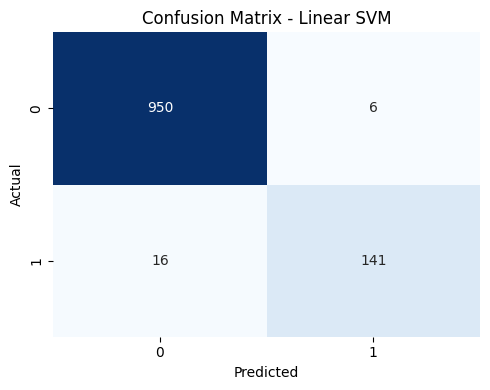


Confusion Matrix for Random Forest


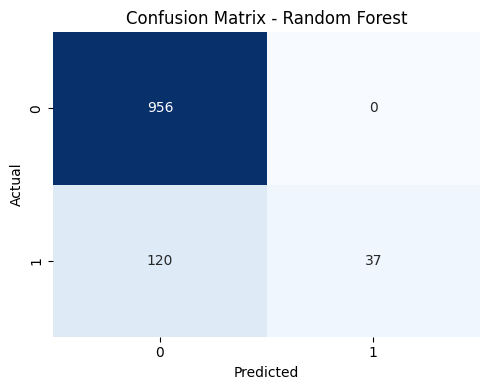


Confusion Matrix for XGBoost


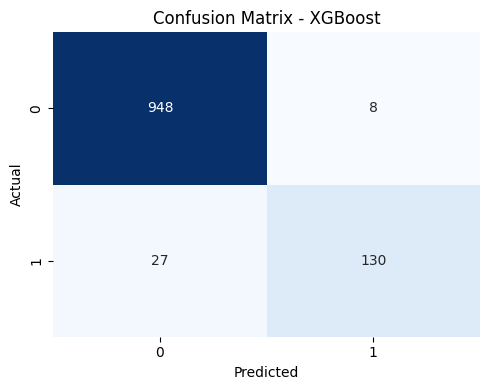

In [ ]:
from sklearn.metrics import confusion_matrix

# ... (previous code for model training and evaluation) ...

# Store results including confusion matrices
results = {}
for name, model in models.items():
    # Fit the model using TF-IDF vectorized data
    model.fit(X_train_tfidf, y_train)  # Use X_train_tfidf instead of X_train

    # Make predictions using TF-IDF vectorized data
    y_pred = model.predict(X_test_tfidf)  # Use X_test_tfidf instead of X_test

    # Calculate and store results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, zero_division=0),
        'confusion_matrix': confusion_matrix(y_test, y_pred)  # Store confusion matrix
    }

# Confusion matrix plotting function (unchanged)
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for all models
for model_name in results:
    print(f"\nConfusion Matrix for {model_name}")
    plot_conf_matrix(results[model_name]['confusion_matrix'], model_name)

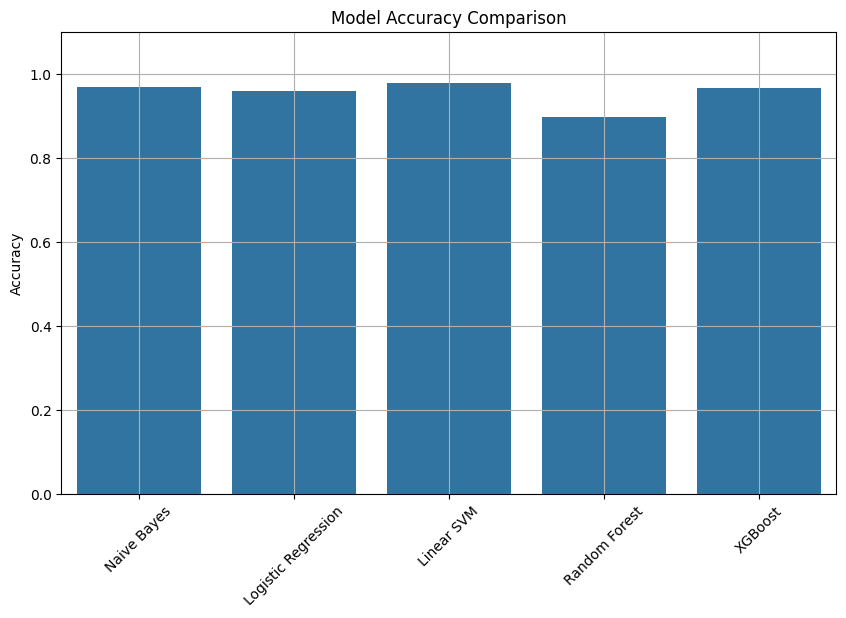

In [ ]:
# Bar Plot
accuracy_data = {name: results[name]['accuracy'] for name in results}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_data.keys()), y=list(accuracy_data.values()))
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.1)
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

best_accuracy = 0.0
best_model_name = ""

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

print(f"✅ Best Model: {best_model_name}")
print(f"🎯 Overall Testing Accuracy: {best_accuracy:.4f}")



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Model: Linear SVM
🎯 Overall Testing Accuracy: 0.9802


LSTM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Tokenization and Padding
max_words = 10000
max_len = 150

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(combined_df['clean_message'])

sequences = tokenizer.texts_to_sequences(combined_df['clean_message'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, combined_df['label'], test_size=0.2, random_state=42)

# Build LSTM Model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 214s 209ms/step - accuracy: 0.7191 - loss: 0.5154 - val_accuracy: 0.9573 - val_loss: 0.1294
Epoch 2/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 257s 204ms/step - accuracy: 0.9682 - loss: 0.1055 - val_accuracy: 0.9619 - val_loss: 0.1119
Epoch 3/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 262s 204ms/step - accuracy: 0.9767 - loss: 0.0738 - val_accuracy: 0.9709 - val_loss: 0.0887
Epoch 4/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 195s 194ms/step - accuracy: 0.9879 - loss: 0.0419 - val_accuracy: 0.9563 - val_loss: 0.1294
Epoch 5/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 205s 198ms/step - accuracy: 0.9906 - loss: 0.0329 - val_accuracy: 0.9737 - val_loss: 0.0956
557/557 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8900
           1       0.98      0.97      0.98      8904

    accuracy                           0.98     17804
   macro avg       0.98      0.98      0.98  

CNN

In [ ]:
pip install tensorflow pandas scikit-learn matplotlib


<ipython-input-12-e8d9cb47be9d>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['label'] = dataset1['label'].astype(int)



⚡ Fast CNN Training on Dataset 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
939/939 ━━━━━━━━━━━━━━━━━━━━ 162s 171ms/step - accuracy: 0.8959 - loss: 0.2784 - val_accuracy: 0.9813 - val_loss: -0.8791
Epoch 2/3
939/939 ━━━━━━━━━━━━━━━━━━━━ 198s 166ms/step - accuracy: 0.9919 - loss: -0.0434 - val_accuracy: 0.9819 - val_loss: -1.4060
Epoch 3/3
939/939 ━━━━━━━━━━━━━━━━━━━━ 202s 166ms/step - accuracy: 0.9922 - loss: -1.5426 - val_accuracy: 0.9834 - val_loss: -1.2325

✅ Dataset 1 - Test Accuracy: 0.9831


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7868
           1       0.98      0.99      0.98      8821
           5       0.00      0.00      0.00         1
        2000       0.00      0.00      0.00         1
        2001       0.00      0.00      0.00         1

    accuracy                           0.98     16692
   macro avg       0.39      0.39      0.39     16692
weighted avg       0.98      0.98      0.98     16692



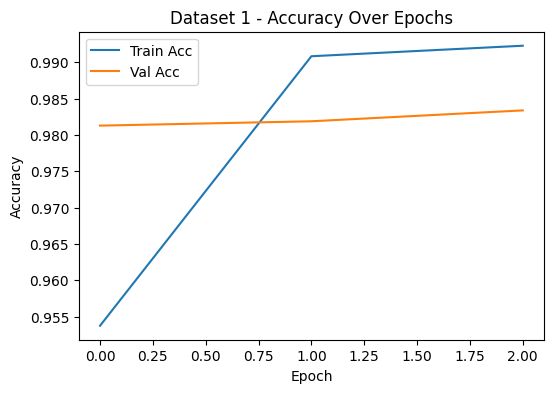


⚡ Fast CNN Training on Dataset 2
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8254 - loss: 0.4994 - val_accuracy: 0.8453 - val_loss: 0.3822
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8863 - loss: 0.2764 - val_accuracy: 0.9619 - val_loss: 0.1172
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9828 - loss: 0.0659 - val_accuracy: 0.9709 - val_loss: 0.0987

✅ Dataset 2 - Test Accuracy: 0.9830
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



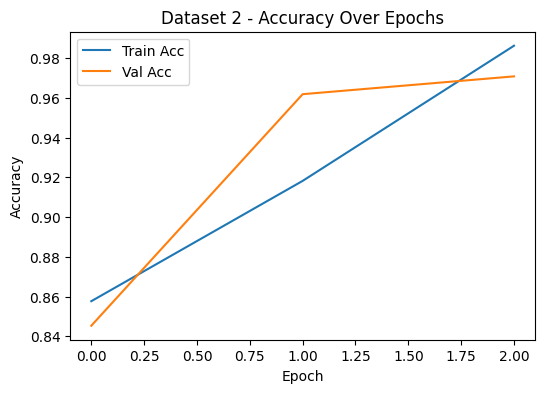

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Text cleaning function
def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", str(text).lower())
    return text

# Preprocess dataset
def preprocess_dataset(df, label_col, text_col):
    df = df[[label_col, text_col]].copy()
    df.dropna(inplace=True)
    df[text_col] = df[text_col].apply(clean_text)
    return df

# Build faster CNN model
def build_fast_cnn(vocab_size, input_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Prepare data
def prepare_data(df, text_col, label_col, max_len=100):
    tokenizer = Tokenizer(oov_token='<OOV>')
    tokenizer.fit_on_texts(df[text_col])
    sequences = tokenizer.texts_to_sequences(df[text_col])
    padded = pad_sequences(sequences, padding='post', maxlen=max_len)
    labels = df[label_col].astype(int).values
    return padded, labels, tokenizer

# Load and preprocess datasets
dataset1 = pd.read_csv('/content/spam2.csv', low_memory=False)
dataset1 = dataset1.rename(columns=lambda x: x.strip().lower())
dataset1 = dataset1[pd.to_numeric(dataset1['label'], errors='coerce').notnull()]
dataset1['label'] = dataset1['label'].astype(int)
dataset1 = preprocess_dataset(dataset1, 'label', 'message')

dataset2 = pd.read_csv('/content/spam.csv')
dataset2 = dataset2.rename(columns=lambda x: x.strip().lower())
dataset2['label'] = dataset2['label'].map({'ham': 0, 'spam': 1})
dataset2 = preprocess_dataset(dataset2, 'label', 'message')

# Faster training on each dataset
for df, name in [(dataset1, "Dataset 1"), (dataset2, "Dataset 2")]:
    print(f"\n⚡ Fast CNN Training on {name}")

    X, y, tokenizer = prepare_data(df, 'message', 'label')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vocab_size = len(tokenizer.word_index) + 1
    input_length = X.shape[1]

    model = build_fast_cnn(vocab_size, input_length)

    # Early stopping to save time
    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    history = model.fit(X_train, y_train,
                        epochs=3,
                        batch_size=64,
                        validation_split=0.1,
                        callbacks=[early_stop],
                        verbose=1)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n✅ {name} - Test Accuracy: {accuracy:.4f}")

    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype("int32")
    print(classification_report(y_test, y_pred))

    # Plot training accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{name} - Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



BI-LSTM

In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Adjust as per your dataset
MAX_WORDS = 5000
MAX_LEN = 100

# Convert NumPy arrays to list of strings
X_train_texts = [' '.join(map(str, seq)) for seq in X_train]
X_test_texts = [' '.join(map(str, seq)) for seq in X_test]

# Fit tokenizer only on training data
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_texts)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

In [ ]:
y_train = np.array(y_train).astype('int32')
y_test = np.array(y_test).astype('int32')


<ipython-input-47-66c9864e0abf>:1: RuntimeWarning: invalid value encountered in cast
  y_train = np.array(y_train).astype('int32')
<ipython-input-47-66c9864e0abf>:2: RuntimeWarning: invalid value encountered in cast
  y_test = np.array(y_test).astype('int32')


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-04-17 14:49:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-17 14:49:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-17 14:49:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

# Load GloVe (adjust path as needed)
embedding_index = {}
with open('/content/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vectors

embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((MAX_WORDS, embedding_dim))

for word, i in word_index.items():
    if i < MAX_WORDS:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPooling1D

model = Sequential([
    Embedding(input_dim=MAX_WORDS,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=MAX_LEN,
              trainable=False),  # freeze GloVe weights

    Bidirectional(LSTM(64, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 61s 238ms/step - accuracy: 0.2019 - loss: -4049690112.0000 - val_accuracy: 0.2663 - val_loss: -28983023616.0000
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 51s 236ms/step - accuracy: 0.2428 - loss: -40405139456.0000 - val_accuracy: 0.2663 - val_loss: -77011722240.0000
Epoch 3/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 79s 223ms/step - accuracy: 0.2447 - loss: -92676579328.0000 - val_accuracy: 0.2663 - val_loss: -135259316224.0000
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 47s 219ms/step - accuracy: 0.2518 - loss: -152787353600.0000 - val_accuracy: 0.2663 - val_loss: -202163486720.0000
Epoch 5/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 83s 223ms/step - accuracy: 0.2466 - loss: -223641468928.0000 - val_accuracy: 0.2663 - val_loss: -277720498176.0000
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 80s 213ms/step - accuracy: 0.2513 - loss: -302848704512.0000 - val_accuracy: 0.2663 - val_loss: -361568239616.0000
Epoch 7/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 84s 223ms/step - accuracy: 0.2503 - 

In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"✅ Improved BiLSTM Test Accuracy: {accuracy * 100:.2f}%")


120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.2532 - loss: -794371424256.0000
✅ Improved BiLSTM Test Accuracy: 25.57%


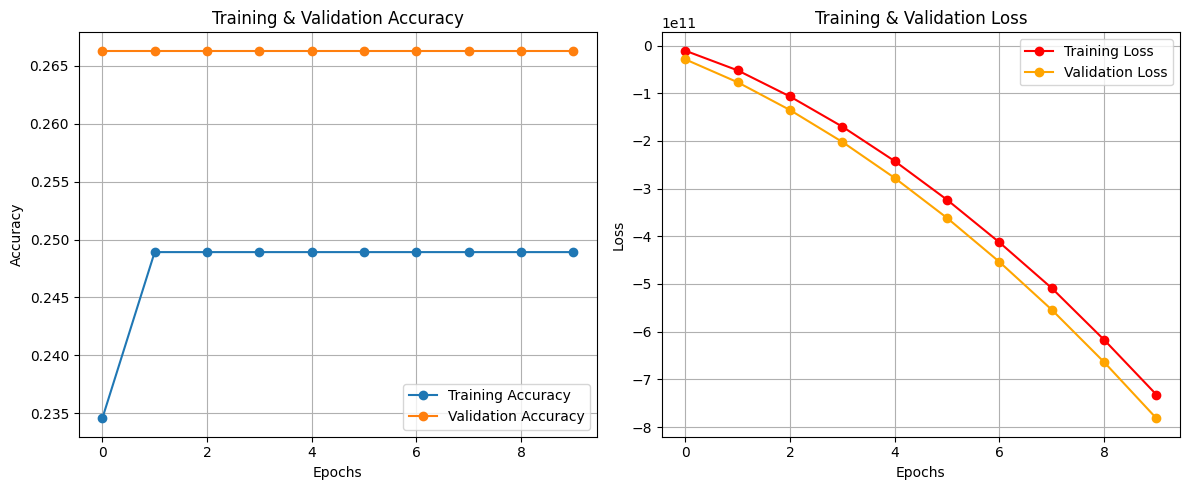

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o', color='red')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


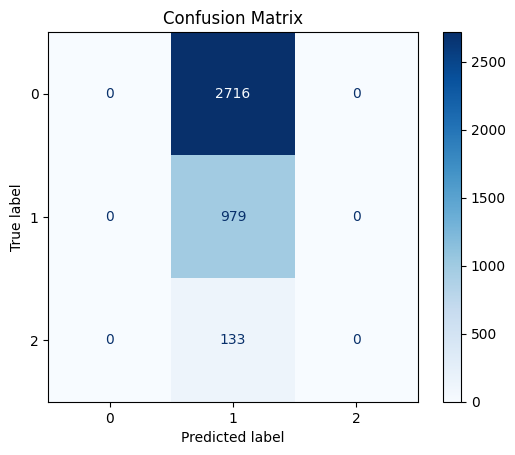

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [1]:
# Step 1: Install dependencies
!pip install transformers datasets --quiet
!pip install torch torchvision torchaudio --quiet

# Step 2: Import libraries
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Step 3: Load the cleaned spam dataset
# Make sure your file is uploaded or in your Colab files
from google.colab import files
uploaded = files.upload()  # Upload your CSV with 'label', 'message', 'cleaned_message' columns

df = pd.read_csv(next(iter(uploaded)))  # Load first uploaded file
print(df.head())

# Convert any string labels (e.g., 'spam', 'ham') to binary 0/1 if needed
df['label'] = df['label'].replace({'spam': 1, 'ham': 0})
df['label'] = df['label'].astype(int)

# Step 4: Split dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_message'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42)

# Step 5: Tokenize using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Step 6: Create Dataset class
class SpamDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SpamDataset(train_encodings, train_labels)
test_dataset = SpamDataset(test_encodings, test_labels)

# Step 7: Load BERT model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Step 8: Optimizer and Dataloader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=5e-5)

# Step 9: Training loop
model.train()
for epoch in range(3):  # 3 epochs
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

# Step 10: Evaluation
model.eval()
preds, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        preds.extend(predictions.cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

print("\nAccuracy:", accuracy_score(true_labels, preds))
print(classification_report(true_labels, preds))

# Step 11: Predict on custom input
def predict_email(text):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    encoding = {k: v.to(device) for k, v in encoding.items()}
    with torch.no_grad():
        output = model(**encoding)
        pred = torch.argmax(output.logits, dim=1).item()
        return "SPAM" if pred == 1 else "HAM"

# Input your own email here
while True:
    text_input = input("\nEnter an email message (or type 'exit' to quit): ")
    if text_input.lower() == 'exit':
        break
    print("Prediction:", predict_email(text_input))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==1

ImportError: cannot import name 'AdamW' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)